# Week1_KaggleLog

---
* 여러 시각화 도구 : matplotlib, seaborn, plotly

* 데이터 분석 도구 : pandas, numpy

* 모델 개발 도구 : sklearn, keras
---

### { 이번 커널의 프로세스 진행 단계 }
1. 데이터 셋 확인
 * 데이터가 어떻게 구성되어 있는지 확인합니다.
 * 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.
 
2. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)
 * 여러 feature들을 개별적으로 분석하고, feature들 간의 상관관계를 확인합니다.
 * 여러 시각화툴을 사용하여 insight를 얻습니다.

3. 특성 공학 (Feature Engineering)
 * 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다.
 * one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
 
4. 모델 개발 및 학습
 * sklearn, keras 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 또 keras는 딥러닝 개발할 때 모델에 집중할 수 있도록 해줍니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수도 있습니다. 그리고 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.
 
5. 모델 예측 및 평가
 * Train set을 가지고 모델을 학습시킨 후, Test set을 가지고 prediction 합니다.
 * 그리고 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다.

> Tip : 그대로 따라 써보는 것도 좋지만, 궁금하면 `print()`로 출력해보고 확인하는 습관을 가지는게 좋다!

### 라이브러리 세팅

In [151]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5)
# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고,
# 일일이 graph 의 font size 를 지정할 필요 없이
# seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
# 워닝 메세지를 생략해 줍니다.
# 차후 버전관리를 위해 필요한 정보라고 생각하시면 주석처리 하시면 됩니다.

%matplotlib inline

os.listdir("./input")

['sample_submission.csv', 'test.csv', 'train.csv']

### 데이터셋 확인

In [152]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
df_submit = pd.read_csv('./input/sample_submission.csv')

In [153]:
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

In [154]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [155]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [156]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [158]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [159]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [160]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [161]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


데이터를 보니 컬럼 count값이 다른 feature가 보인다.

결측치(Null)가 있는 것으로 보이는데 한번 알아보도록 하자.

In [162]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [163]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

train set과 test set에 비슷하게 Age 피쳐에 약 20%, Cabin 피쳐에 약 80%의 결측치가 있음을 확인할 수 있다.

target label이 어떤 분포를 가지고 있는지 확인해봐야한다.

지금 같은 binary classification 문제의 경우에서,

1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

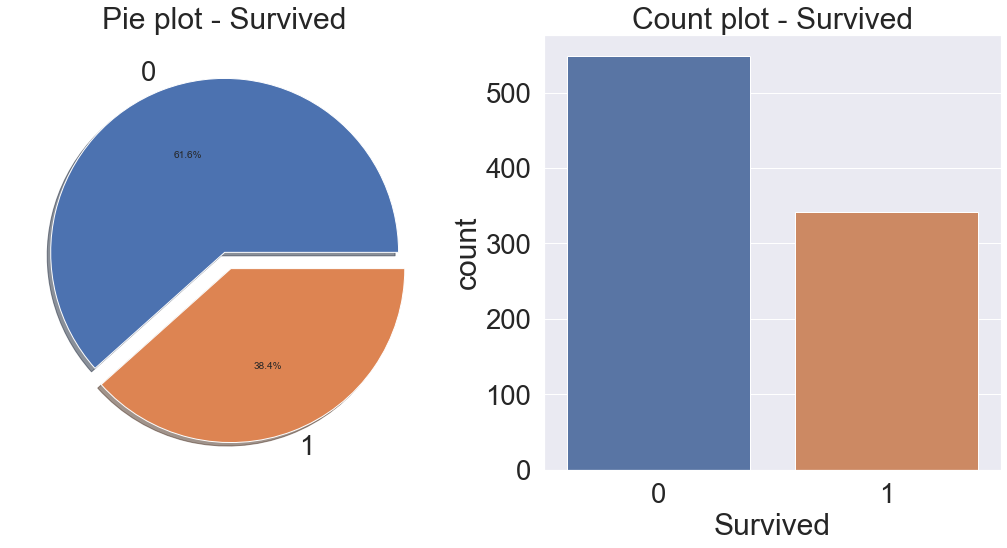

In [164]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                            autopct='%1.1f%%',
                                            ax=ax[0],
                                            shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

target label의 분포가 제법 균일(balanced)합니다.

불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는

만약 모델이 모든 것을 1이라 해도 정확도가 99%가 나오게 됩니다.

0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다.

지금 문제에서는 그렇지 않으니 계속 진행하겠습니다.

### 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)

2.1 Pclass

* Pclass는 서수형 데이터입니다.
  
  즉, 카테고리이면서 순서가 있는 데이터 타입입니다.
  
  먼저 Pclass에 따른 생존률의 차이를 살펴보겠습니다.
  
* 엑셀의 피벗차트와 유사한 작업을 하게 되는데,

  pandas dataframe에서는 `groupby`를 사용하면 쉽게 할 수 있습니다.
  
  또한 `pivot`이라는 메소드도 있습니다.
  
* `Pclass`, `Survived`를 가져온 후, pclass로 묶습니다.

  그러고 나면 각 pclass마다 0, 1이 count가 되는데,
  
  이를 평균내면 각 pclass 별 생존률이 나옵니다.
  
* 아래와 같이 count()를 하면, 각 class에 몇 명이 있는지 확인할 수 있으며,

  sum()을 하면, 216명 중 생존한(survived=1) 사람의 총합을 주게 됩니다.

In [165]:
# pclass 그룹 별 데이터 카운트
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [166]:
# pclass 그룹 별 생존자 수 합
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [167]:
# 위와 같은 작업을 crosstab으로 편하게 할 수 있습니다.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [168]:
# mean은 생존률을 구하게 할 수 있습니다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

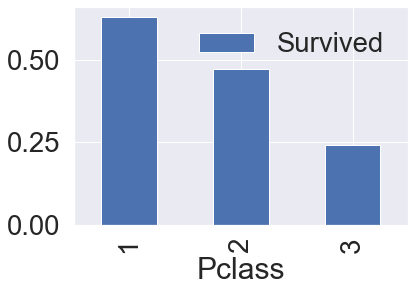

In [169]:
# 이를 시각화 해보도록 하자.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

우리는 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며,

나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있습니다.

2.2 Sex

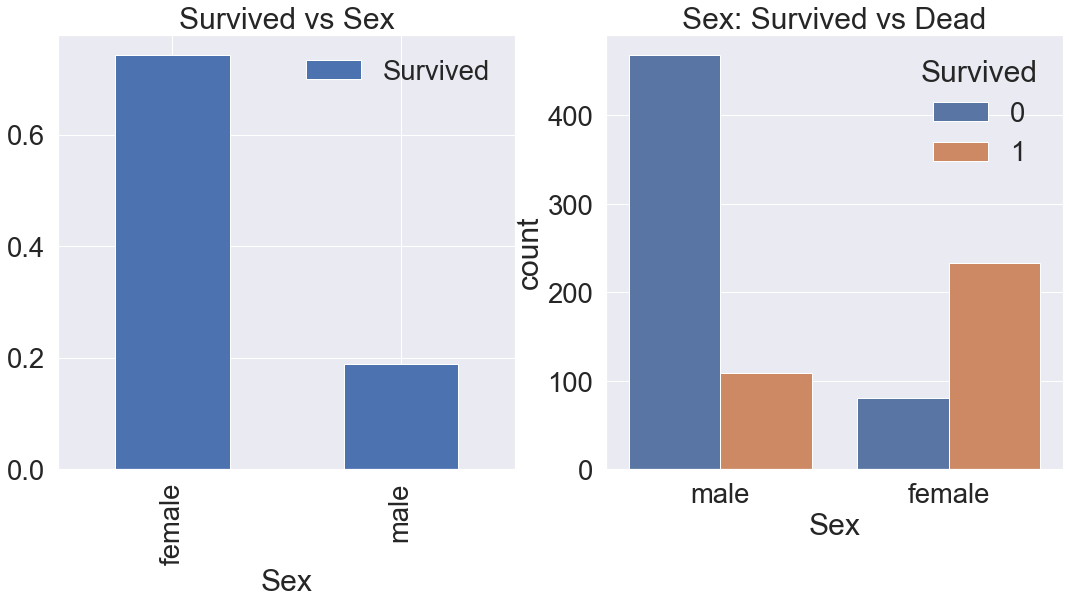

In [170]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

보시다시피, 여자가 생존할 확률이 높습니다.

Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature 임을 알 수 있습니다.

2.3 Both Sex and Pclass

이번에는 Sex와 Pclass 두가지에 관하여 생존이 어떻게 달라지는지 확인해봅시다.

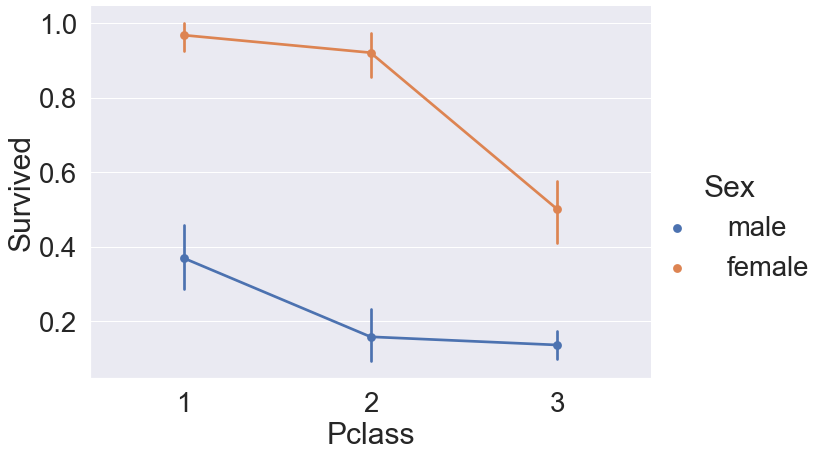

In [171]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

모든 클래스에서 female이 살 확률이 male보다 높은 걸 알 수 있습니다.

2.4 Age

In [172]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


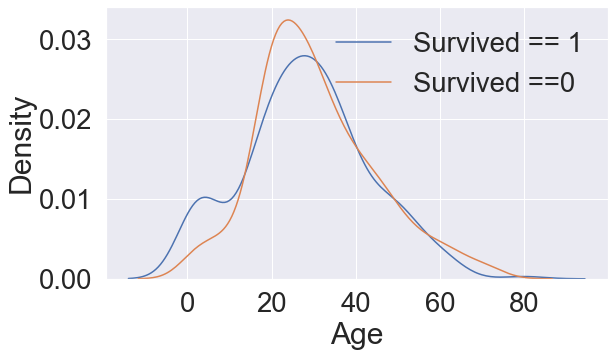

In [173]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived ==0'])
plt.show()

해당 히스토그램을 보시면 어린나이 (약 15세 미만) 구간에서

생존률이 상대적으로 높음을 확인할 수 있습니다.

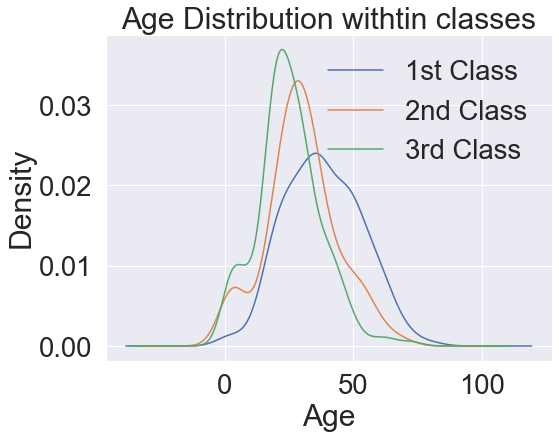

In [174]:
# Age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution withtin classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

위의 그래프 클래스가 높아질수록, 나이 연령대가 높아짐을 확인할 수 있습니다.

나이대가 높아질수록 생존확률이 어떻게 달라지는지 알고 싶어져 누적확률을 활용한 시각화를 해보았습니다.

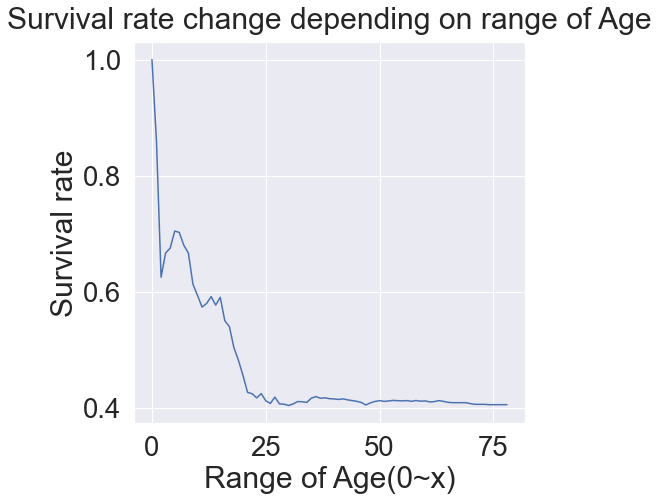

In [175]:
cummulate_survival_ratio = []

for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

나이가 어릴수록 생존률이 확실히 높은 것을 확인할 수 있습니다.

이를 통해 나이도 중요한 피쳐임을 확인할 수 있습니다.

지금까지 얻은 분석을 종합하자면,

 * 여자이거나
 * 나이가 어리고
 * 클래스가 높을 수록

생존확률이 높음을 확인할 수 있었습니다.

2.5 Embarked

Embarked : 탑승한 항구

In [176]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked'>

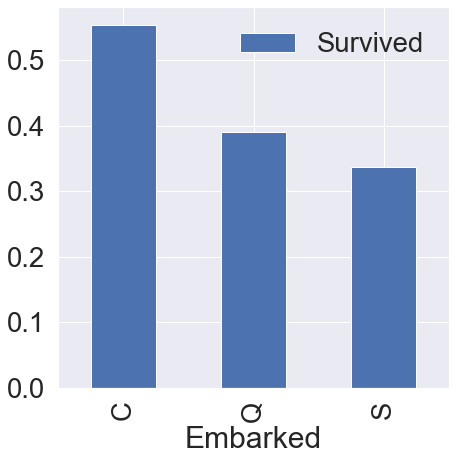

In [177]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

탑승한 곳에 따라 생존률의 차이가 많이 보이지는 않지만,

그래도 차이가 있으니 피쳐로 사용해보겠습니다.

그럼 다른 피쳐와의 상관관계도 한번 알아보도록 하겠습니다.

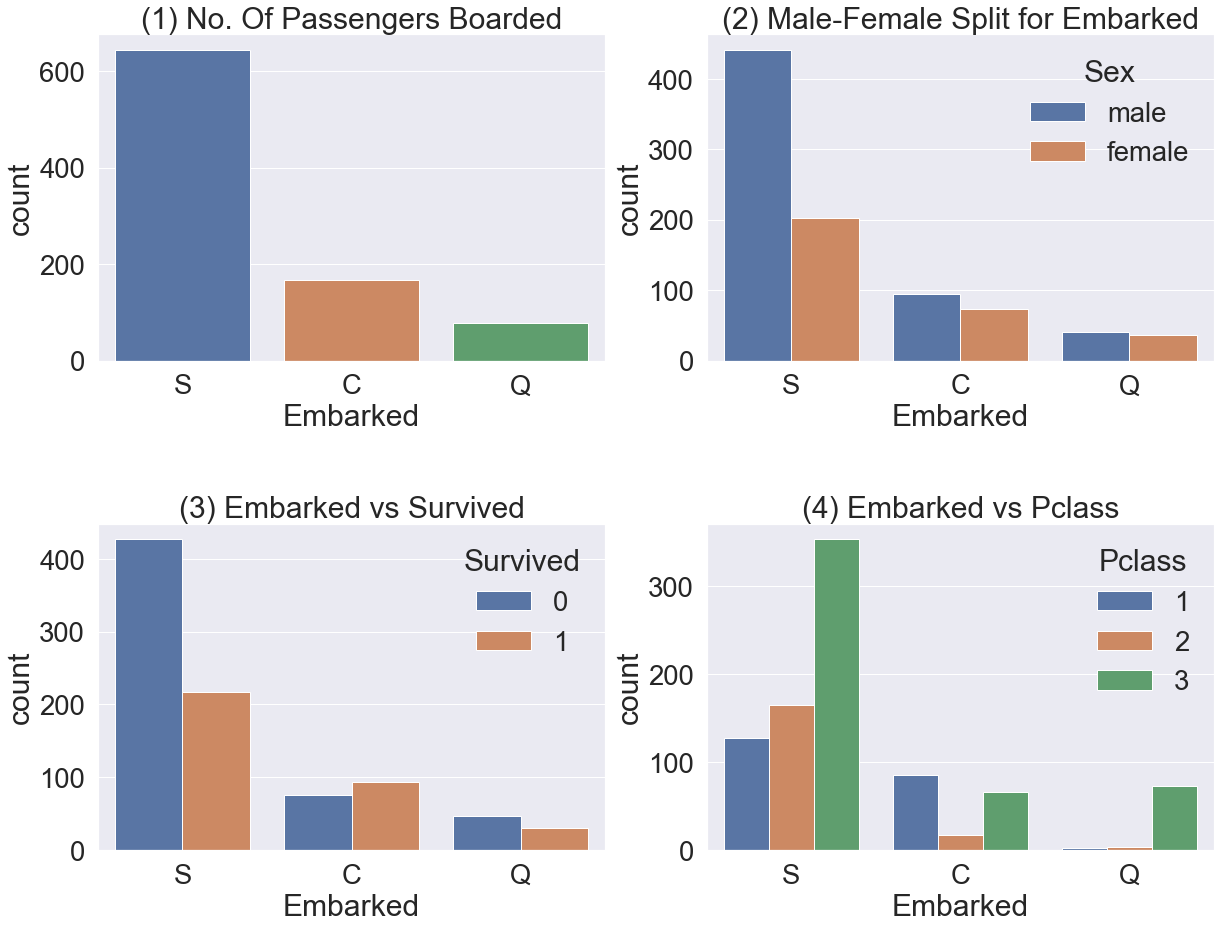

In [178]:
f, ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure(1) - 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승했스비낟.
* Figure(2) - C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.
* Figure(3) - 생존 확률이 S 경우 많이 낮은 걸 볼 수 있습니다. (이전 그래프에서 봤었습니다.)
* Figure(4) - Class로 split해서 보니, C가 생존확률이 높은 건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd class가 많아서 생존확률이 낮게 나옵니다.

2.6 Family - SibSp(형제 자매) + Parch(부모, 자녀)

`SibSp`와 `Parch`를 합치면 함께 탑승한 가족의 수가 될 것입니다.

이 두 피쳐를 더해서 새로운 피쳐 `FamilySize`를 만들어 보도록 하겠습니다.

(사실 새로운 피쳐를 만들어 내는 건 특성 공학쪽에서 다뤄야 하지만 일단 미리 보겠습니다.)

In [179]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더한다.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더한다.

In [180]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


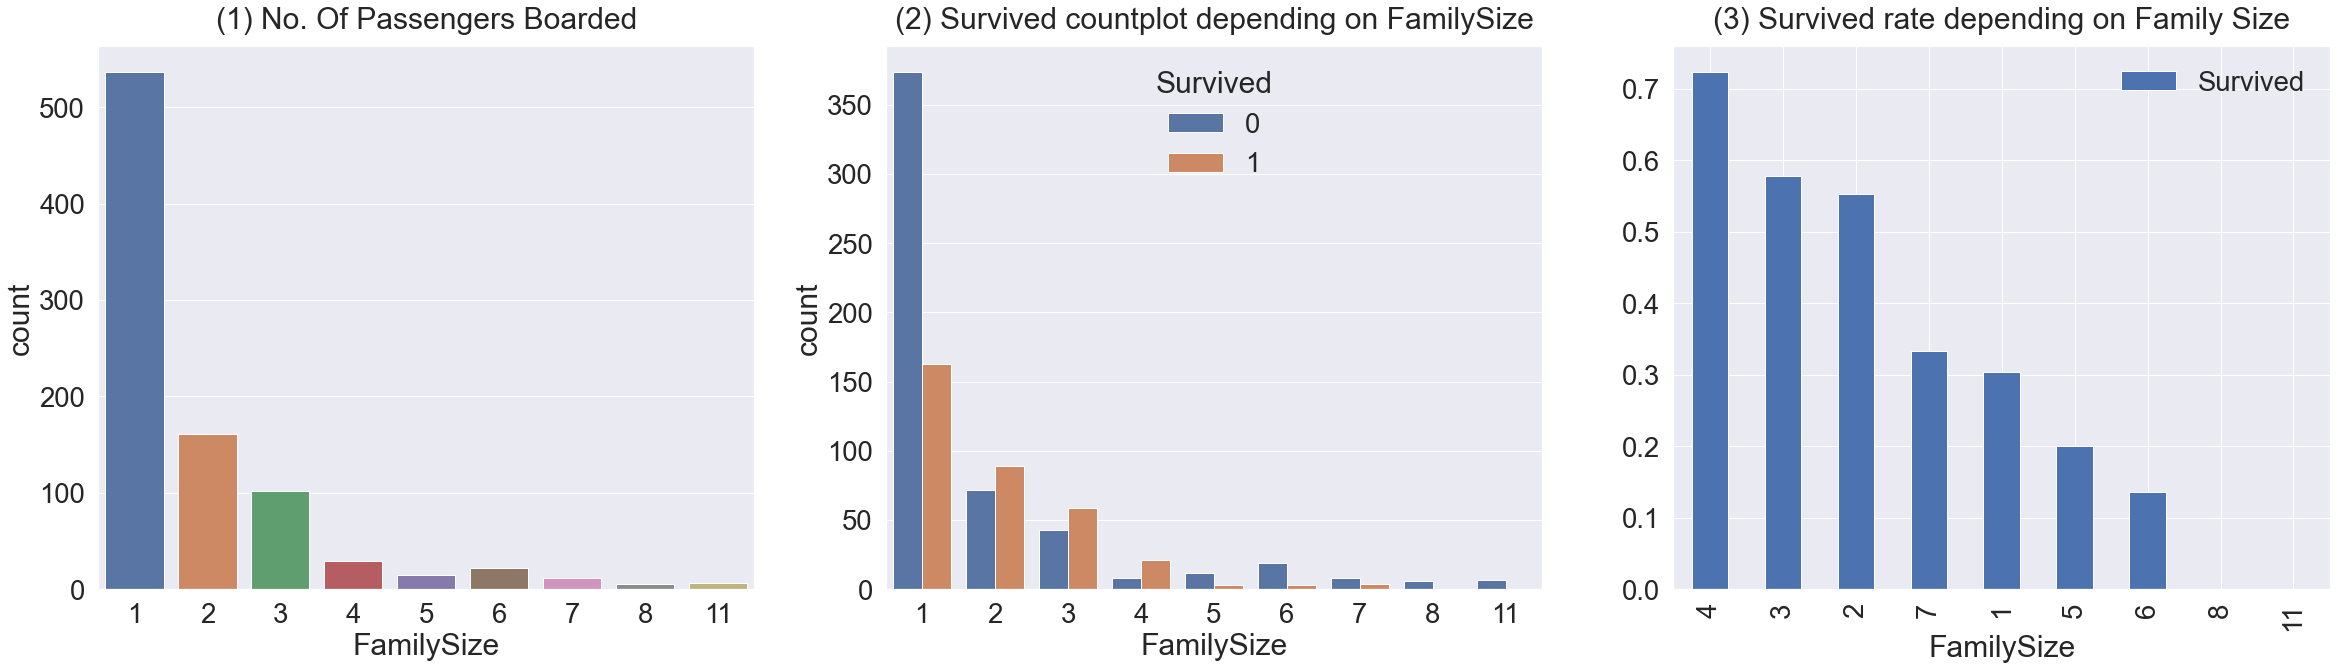

In [181]:
f, ax = plt.subplots(1,3,figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'],
                                             as_index=True).mean().sort_values(by='Survived',
                                                                               ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Family Size', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure(1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2,3,4명입니다.
* Figure(2),(3) - 가족크기에 따른 생존비교입니다.

> 가족이 4명인 경우가 가장 생존확률이 높습니다.
>
> 가족수가 많아질수록 (5,6,7,8,11) 생존확률이 낮아집니다.
>
> 가족수가 너무 작아도 (1), 너무 커도 (5,6,8,11) 생존 확률이 작네요.
>
> 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다.

2.7 Fare

해당 피쳐는 탑승 요금입니다. 연속적인 데이터이므로 히스토그램을 한 번 그려보도록 하겠습니다.

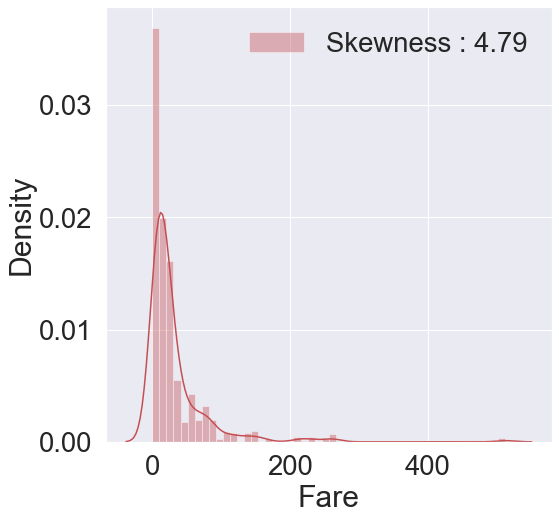

In [182]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

g = sns.distplot(df_train['Fare'], color='r', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)

g = g.legend(loc='best')

In [183]:
# 특이하게도 train set 말고 test set에 Fare 피쳐에 널 값이 하나 존재하는 것을 확인할 수 있었습니다.

# 그래서 평균값으로 해당 널값을 넣어줍니다.
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset에 있는 nan value를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

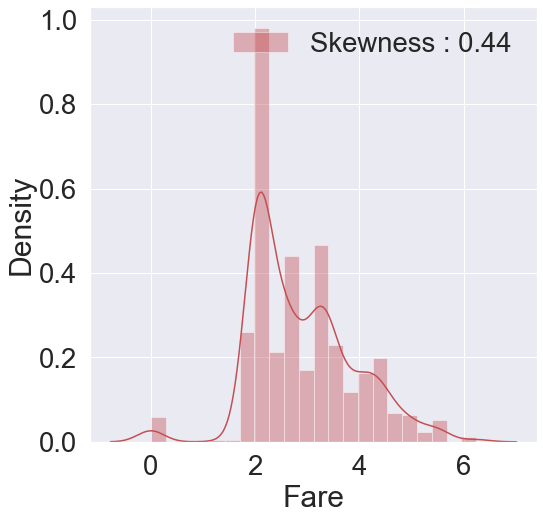

In [184]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

g = sns.distplot(df_train['Fare'], color='r', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)

g = g.legend(loc='best')

log를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.

이러한 작업을 통해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.

사실 방금한 것은 feature engineering에 들어가는 부분입니다.

모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나,

새로운 feature를 추가하는 것을 feature engineering이라고 하는데,

우리는 다음챕터에 그것을 살펴볼 것입니다.

2.8 Cabin

이 feature는 NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않다.

그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠다.

In [185]:
### Cabin 피쳐의 Null 비율 계산
df_train['Cabin'].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [186]:
df_train.head()[["PassengerId", "Cabin"]]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


2.9 Ticket

이 피쳐는 결측값이 없습니다.

일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데,

이를 위해서는 아이디어가 필요하다.

In [187]:
df_train['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
347088      6
CA 2144     6
           ..
370376      1
226875      1
349242      1
16988       1
2685        1
Name: Ticket, Length: 681, dtype: int64

보시다시피, ticket number 는 매우 다양합니다.

우리는 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까요?

한번 생각을 해보시고 새로운 Feature를 만들어 모델의 성능을 끌어올리는 것도

재밌는 데이터 분석 과정 중 하나니 힘내서 생각하시고 즐겨보시길 바랍니다!!

### 특성 공학 (Feature Engineering)

가장 먼저, dataset에 존재하는 null data를 채우려고 합니다.

아무 숫자로 채울 수는 없고, null data를 포함하는 feature의 statistics를 참고하거나,

다른 아이디어를 짜내어 채울 수 있습니다.

null data를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지될 수 있기 때문에, 신경써줘야할 부분입니다.

특히, Feature Engineering은 실제 모델의 학습에 쓰려고 하는 것이므로,

train 뿐만 아니라 test도 똑같이 적용해주어야 합니다. 잊지맙시다!!!

3.1 Fill Null

3.1.1 Fill Null in Age using title

In [188]:
df_train['Age'].isnull().sum()

177

Age 에는 null data가 177개나 있습니다.

이를 채울 수 있는 여러 아이디어가 있을 것인데,

여기서 우리는 title + statistics 를 사용해 보겠습니다.

영어에서는 Miss, Mrr, Mrs 같은 title이 존재합니다.

각 탑승객의 이름에는 꼭 이런 title 이 들어가게 되는데 이를 사용해보겠습니다.

pandas series 에는 data 를 string 으로 바꿔주는 str method,

거기에 정규표현식을 적용하게 해주는 extract method가 있습니다.

이를 사용하여 title 을 쉽게 추출할 수 있습니다.

title을 Initial column에 저장하겠습니다

In [189]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [190]:
#lets extract the Salutations
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
#lets extract the Salutations
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [191]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [192]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.057860,NaN,Q,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,1.945910,NaN,S,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.270836,NaN,Q,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.159003,NaN,S,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.508582,NaN,S,3,Mrs


pandas의 crosstab을 이용하여 우리가 추출한 Initial과 Sex간의 count를 살펴봅시다.

혹시나 잘 못 이름이 적혀져 있거나 성별을 잘 못 분류 했을 수도 있으니깐요?

In [193]:
# Checking the Initials with the Sex
# T : 전치
# style.background_gradient() : 수치의 크기를 색상 온도로 보는 것
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [194]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [195]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

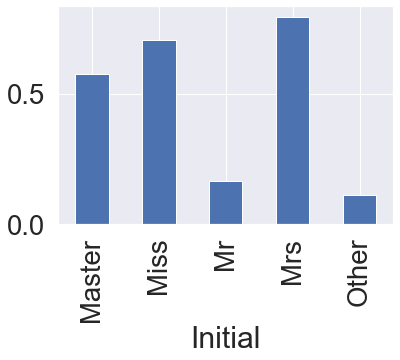

In [196]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

이제 본격적으로 Null 을 채울 것입니다. null data 를 채우는 방법은 정말 많이 존재합니다.
statistics 를 활용하는 방법도 있고, null data 가 없는 데이터를
기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식도 있습니다.
(딥러닝에서 디노이징 오토인코더 라는 것이 있습니다!)

여기서는 statistics 를 활용하는 방법을 사용할 것입니다.
여기서 statistics 는 train data 의 것을 의미합니다.
우리는 언제나 test 를 unseen 으로 둔 상태로 놔둬야 하며,
train 에서 얻은 statistics 를 기반으로 test 의 null data 를 채워줘야 합니다.

In [197]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


저희는 각 initial 그룹별 Age 평균 값을 사용해서 채워 넣도록 하겠습니다.

In [198]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [199]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [200]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Cabin    327
dtype: int64

train & test 셋에 Age의 널처리가 완전히 끝난 것을 보실 수 있습니다.

여기선 간단하게 Null을 채웠지만, 좀 더 다양한 방법을 쓴 예시들이 다른 커널에 존재합니다
https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 보시면서 공부해보세요!

3.1.2 Fill Null in Embarked

In [201]:
sum(df_train['Embarked'].isnull())

2

In [202]:
print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has 2 Null values


Embarked 는 Null value 가 2개이고, S 에서 가장 많은 탑승객이 있었으므로,
간단하게 Null 을 S로 채우겠습니다.

dataframe 의 fillna method 를 이용하면 쉽게 채울 수 있습니다.
여기서 inplace=True 로 하면 df_train 에 fillna 를 실제로 적용하게 됩니다.

In [203]:
df_train['Embarked'].fillna('S',inplace=True)

In [204]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Cabin    687
dtype: int64

3.2 Change Age(continuous to categorical)

Age 는 현재 continuous feature 입니다.

이대로 써도 모델을 세울 수 있지만,

Age 를 몇개의 group 으로 나누어 category 화 시켜줄 수 도 있습니다.

***continuous 를 categorical 로 바꾸면 자칫 information loss 가 생길 수도 있습니다만,***

본 튜토리얼에서는 다양한 방법을 소개하는 것이 목적이므로 진행하도록 하겠습니다.

방법은 여러가지가 있습니다.

dataframe 의 indexing 방법인 loc 를 사용하여 직접해줄 수 있고, 아니면 apply 를 사용해 함수를 넣어줄 수 있습니다.

loc 예제는 위의 age mean 값을 채워 줬을 때 사용해 봤으므로, 여기에선 apply를 사용해 보도록 하겠습니다.

In [205]:
def category_age(x):
    if x<10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [206]:
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [207]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [208]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.057860,NaN,Q,1,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,1.945910,NaN,S,2,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.270836,NaN,Q,1,Mr,6
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.159003,NaN,S,1,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.508582,NaN,S,3,Mrs,2


In [209]:
# Age_cat에 따라 PassengerId 갯수 세기
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

이제 파생 피쳐를 만들었으므로 원래 컬럼 Age 를 제거하는게 맞겠지만,
저희는 상관 관계가 높아도 모델의 설명력(성능)에 도움이 될 수 있으니
남겨 보도록 하겠습니다.

3.3 Change Initial, Embarked and Sex (string to numerical)

현재 Initial 은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있습니다.
이런 카테고리로 표현되어져 있는 데이터를 모델에 인풋으로 넣어줄 때
우리가 해야할 것은 먼저 컴퓨터가 인식할 수 있도록 수치화 시켜야 합니다.

map method 를 가지고 간단히 할 수 있습니다.
사전 순서대로 정리하여 mapping 하겠습니다

In [210]:
df_train['Initial'] = \
df_train['Initial'].map({'Master': 0,
                         'Miss': 1,
                         'Mr': 2,
                         'Mrs': 3,
                         'Other': 4})
df_test['Initial'] = \
df_test['Initial'].map({'Master': 0,
                        'Miss': 1,
                        'Mr': 2,
                        'Mrs': 3,
                        'Other': 4})

마찬가지 Embarked와 Sex 피쳐도 string이라 같은 과정을 거치겠습니다.

In [211]:
df_train['Embarked'] = \
df_train['Embarked'].map({'C': 0,
                          'Q': 1,
                          'S': 2})

df_test['Embarked'] = \
df_test['Embarked'].map({'C': 0,
                         'Q': 1,
                         'S': 2})

In [212]:
df_train['Embarked'].isnull().any() , df_train['Embarked'].dtypes

(False, dtype('int64'))

널이 없고, int형으로 잘 바뀐 것으로 보아 잘 변환 되었음을 확인할 수 있습니다.


마찬가지 sex에도 적용합니다.

In [213]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [214]:
df_train['Sex'].isnull().any() , df_train['Sex'].dtypes

(False, dtype('int64'))

여지껏 고생하셨습니다!! 엄청 많은걸 하셨어요!!

이제 각 feature 간의 상관관계를 한번 보려고 합니다.
두 변수간의 Pearson correlation 을 구하면 (-1, 1) 사이의 값을 얻을 수 있습니다.

* -1로 갈수록 음의 상관관계,
* 1로 갈수록 양의 상관관계를 의미하며
* 0은 상관관계가 없다는 것을 의미합니다.

따로 수식은 적지 않도록 하겠습니다. 검색만 하셔도 수식은 많이 나오니
궁금하시면 공부해보시걸 추천합니다!

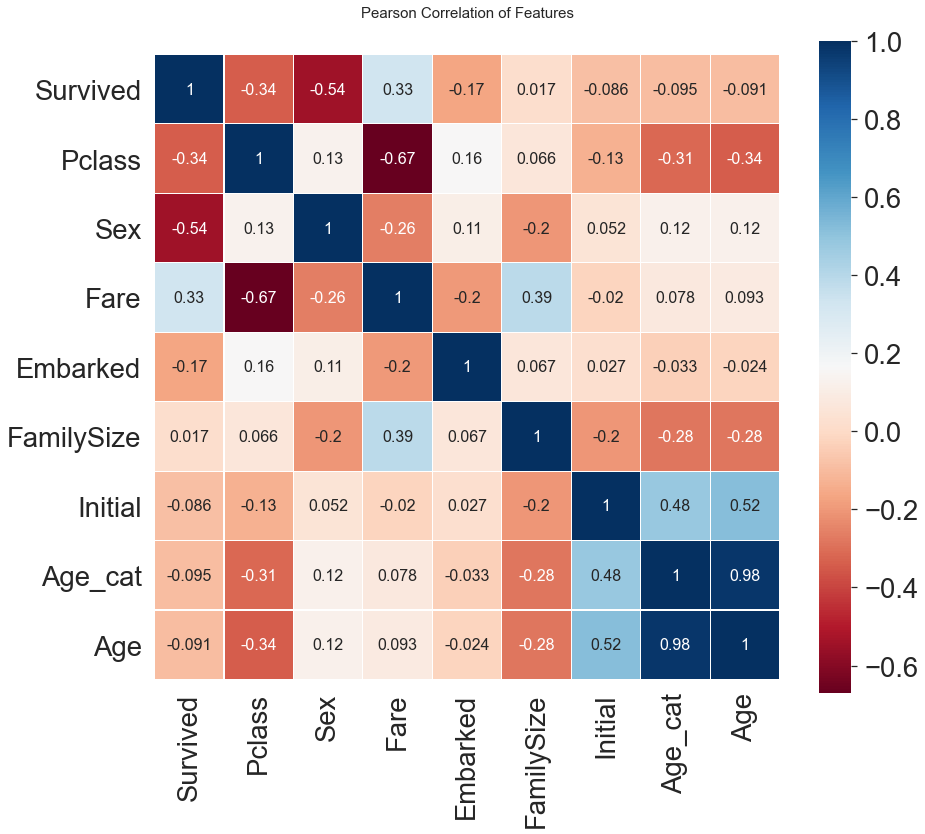

In [215]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare',
                         'Embarked', 'FamilySize', 'Initial',
                         'Age_cat', 'Age']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1,
           vmax=1.0, square=True, cmap=colormap, linecolor='white',
           annot=True, annot_kws={"size":16})

del heatmap_data

우리가 EDA에서 살펴봤듯이,
Sex 와 Pclass 가 Survived 에 상관관계가 어느 정도 있음을 볼 수 있습니다.

생각보다 fare 와 Embarked 도 상관관계가 있음을 볼 수 있습니다.

또한 우리가 여기서 얻을 수 있는 정보는
서로 강한 상관관계를 가지는 feature들이 없다는 것입니다.
(Age와 Age_cat 제외..)
이것은 우리가 모델을 학습시킬 때, 불필요한 feature 가 없다는 것을 의미합니다.
1 또는 -1 의 상관관계를 가진 feature A, B 가 있다면, 우리가 얻을 수 있는 정보는 사실 하나일 거니까요.

이제 실제로 모델을 학습시키기 앞서서 data preprocessing (전처리)을 진행해보겠습니다.
거의 다 와갑니다 힙냅시다!

3.4 One-hot encoding on Initial and Embarked

수치화시킨 카테고리 데이터를 그대로 넣어도 되지만,
모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있습니다.

수치화는 간단히 Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4 로 매핑해주는 것을 말합니다.

One-hot encoding 은 위 카테고리를 아래와 같이 (0, 1) 로 이루어진 5차원의 벡터로 나타내는 것을 말합니다.

이렇게 하게 되면 각 클래스간 연관성을 Orthogonal(직교, 동일하게) 만들 수 있습니다.
그래서 각 클래스 관의 상관 관계가 없어집니다.

More?: 그냥 수치화 했을 경우 Master랑 Miss가 가까운 관계, Mrs와 Other이 가까운 관계로 해석될 수 있습니다.
더 자세한 사항은 Label Encoding vs One-hot Encoding 으로 검색하시면 더 자세하게 알아 보실 수 있습니다.

위와 같은 작업을 직접 코딩할 수도 있지만, pandas 의 get_dummies 를 사용하여 쉽게 해결 할 수 있습니다.
총 5개의 카테고리니, one-hot encoding 을 하고 나면 새로운 5개의 column 이 생겨납니다.
Initial 을 prefix로 두어서 구분이 쉽게 만들어 줍니다 .

In [216]:
df_train = pd.get_dummies(df_train, columns=['Initial'],prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'],prefix='Initial')

In [217]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [218]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.057860,NaN,1,1,3,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,1.945910,NaN,2,2,4,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.270836,NaN,1,1,6,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.159003,NaN,2,1,2,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,2.508582,NaN,2,3,2,0,0,0,1,0


Embarked 에도 적용하겠습니다. Initial 때와 마찬가지로 one-hot encoding 을 사용해 표현하겠습니다.

In [219]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [220]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,...,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,...,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,...,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,...,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,...,1,3,0,0,1,0,0,0,0,1


In [221]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.057860,NaN,1,3,0,0,1,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,1.945910,NaN,2,4,0,0,0,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.270836,NaN,1,6,0,0,1,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.159003,NaN,1,2,0,0,1,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,2.508582,NaN,3,2,0,0,0,1,0,0,0,1


아주 쉽게 one-hot encoding 을 적용했습니다.
다른 패키지로도 원핫 인코딩을 적용 시킬 수 있지만, 여기에선 다루지 않겠습니다.

Tips: 가끔 category 가 100개가 넘어가는 경우가 있습니다.
이때 one-hot encoding을 사용하면 column이 100개가 생겨,
학습시 매우 버거울 경우가 있습니다. (차원의 저주라고 부르기도 합니다.)

이런 경우는 다른 방법을 사용하기도 하는데, 이는 나중에 다른 컴피티션 참가하시면
차원의 저주 키워드로 해결 방법을 모색하시길 바랍니다!

3.5 Drop columns

마지막으로 필요없는 피쳐를 없애버릴 차례입니다!

In [222]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [223]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


In [224]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [225]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,47.0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,62.0,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,27.0,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,22.0,2.508582,3,2,0,0,0,1,0,0,0,1


In [226]:
df_test.dtypes

Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

보시다시피, train 의 Survived feature(target class)를 빼면
train, test 둘다 같은 columns 를 가진 걸 확인할 수 있습니다.

### 4. 모델 개발 및 학습

Sklearn 은 머신러닝의 처음부터 끝까지가 다 있습니다
feature engineering, preprocessing, 지도 학습 알고리즘, 비지도 학습 알고리즘, 모델 평가, 파이프라인 등... 머신러닝에 관련된 모든 작업들이 손쉬운 인터페이스로 구현되어 있습니다.
데이터 분석 + 머신러닝을 하고싶다면, 이 라이브러리는 반드시 숙지해야합니다.

파이썬 라이브러리를 활용한 머신러닝(Introduction to machine larning with Python)
핸즈온 머신러닝
sklearn 뿐만 아니라 머신러닝/딥러닝에 관한 기본을 잘 설명하고 있는 책들이니 공부하시는 것 권해드립니다!

지금 타이타닉 문제는 target class(survived)가 있으며, target class 는 0, 1로 이루어져 있으므로(binary)
binary classfication 문제입니다.

우리가 지금 가지고 있는 train set 의 survived를 제외한 input 을 가지고
모델을 최적화시켜서 각 샘플(탑승객)의 생존유무를 판단하는 모델을 만들어 냅니다.
그 후 모델이 학습하지 않았던 test set 을 input 으로 주어서 test set 의 각 샘플(탑승객)의 생존 유무를 예측해봅니다.

In [228]:
#importing all the required ML packages

# 유명한 randomforestclassfier 입니다.
from sklearn.ensemble import RandomForestClassifier  
# 모델의 평가를 위해서 씁니다
from sklearn import metrics 
# traning set을 쉽게 나눠주는 함수입니다.
from sklearn.model_selection import train_test_split 

4.1 Preparation - Split dataset into train, valid(dev), test set

가장 먼저, 학습에 쓰일 데이터와, target label(Survived)를 분리합니다.

drop 을 사용해 간단히 할 수 있습니다.

In [234]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [235]:
X_train

array([[ 3.,  1., 22., ...,  0.,  0.,  1.],
       [ 1.,  0., 38., ...,  1.,  0.,  0.],
       [ 3.,  0., 26., ...,  0.,  0.,  1.],
       ...,
       [ 3.,  0., 22., ...,  0.,  0.,  1.],
       [ 1.,  1., 26., ...,  1.,  0.,  0.],
       [ 3.,  1., 32., ...,  0.,  1.,  0.]])

In [236]:
X_test

array([[ 3. ,  1. , 34.5, ...,  0. ,  1. ,  0. ],
       [ 3. ,  0. , 47. , ...,  0. ,  0. ,  1. ],
       [ 2. ,  1. , 62. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 3. ,  1. , 38.5, ...,  0. ,  0. ,  1. ],
       [ 3. ,  1. , 33. , ...,  0. ,  0. ,  1. ],
       [ 3. ,  1. ,  5. , ...,  1. ,  0. ,  0. ]])

In [237]:
target_label

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [238]:
X_train.shape, X_test.shape

((891, 14), (418, 14))

보통 train, test 만 언급되지만,
실제 좋은 모델을 만들기 위해서 우리는 valid(dev) set을 따로 만들어 모델 평가를 해봅니다.

수능으로 비유하자면,
공부(train)를 하고 바로 수능(test)을 치는 것이 아니라,
공부(train)을 한 다음 모의고사(valid)를 거쳐 개인 학습정도를 확인하고
수능(test)을 치는 것과 비슷합니다.

train_test_split 을 사용하여 쉽게 train 셋에서 train과 validation을 분리할 수 있습니다

> More?
>
> Overfitting(과적합) 이슈를 나중에 공부해보시면 왜 Validation을 나누는지 이해할 수 있을 것입니다!

In [241]:
X_tr, X_vld, y_tr, y_vld = \
train_test_split(X_train, target_label,
                 test_size=0.2, random_state=2018)

In [243]:
X_tr

array([[ 2. ,  1. , 34. , ...,  0. ,  0. ,  1. ],
       [ 3. ,  1. , 33. , ...,  0. ,  1. ,  0. ],
       [ 3. ,  1. , 34.5, ...,  1. ,  0. ,  0. ],
       ...,
       [ 2. ,  1. , 19. , ...,  0. ,  0. ,  1. ],
       [ 3. ,  1. , 35. , ...,  0. ,  0. ,  1. ],
       [ 3. ,  1. , 33. , ...,  0. ,  0. ,  1. ]])

In [244]:
X_vld

array([[ 1.,  1., 64., ...,  0.,  0.,  1.],
       [ 3.,  1., 19., ...,  0.,  0.,  1.],
       [ 1.,  1., 27., ...,  0.,  0.,  1.],
       ...,
       [ 3.,  0., 22., ...,  0.,  1.,  0.],
       [ 2.,  0., 45., ...,  0.,  0.,  1.],
       [ 1.,  0., 41., ...,  1.,  0.,  0.]])

In [242]:
y_tr.shape, y_vld.shape

((712,), (179,))

sklearn 에서는 여러 머신러닝 알고리즘을 지원해줍니다.
열거하기엔 너무 많으므로, 직접 documentation에 들어가 보시길 추천합니다.
http://scikit-learn.org/stable/supervised_learning.html#supervised-learning
여기에 들어가시면 지원되는 알고리즘 수에 놀라실 겁니다.

본 튜토리얼에서는 랜덤포레스트 모델을 사용하도록 하겠습니다.

랜덤포레스트는 결정트리기반 모델이며, 여러 결정 트리들을 앙상블한 모델입니다.
더 자세한 설명을 추천해드린 책이나 각종 블로그에 설명이 잘 되어있으니 찾아보시길 바랍니다!

각 머신러닝 알고리즘에는 여러 파라미터들이 있습니다.
랜덤포레스트분류기도 n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf 등 여러 파라미터들이 존재합니다.
이것들이 어떻게 세팅되냐에 따라 같은 데이터셋이라 하더라도 모델의 성능이 달라집니다.

파라미터 튜닝은 시간, 경험, 알고리즘에 대한 이해 등이 필요합니다.
결국 많이 써봐야 모델도 잘 세울 수 있는 것이죠. 그래서 캐글을 추천합니다.
여러 데이터셋을 가지고 모델을 이리저리 써봐야 튜닝하는 감이 생길테니까요!

일단 지금은 튜토리얼이니 파라미터 튜닝은 잠시 제쳐두기로 하고,
기본 default 세팅으로 진행하겠습니다.

모델 객체를 만들고, fit 메소드로 학습시킵니다.
그런 후 valid set input 을 넣어주어 예측값(X_vld sample(탑승객)의 생존여부)를 얻습니다.

4.2 Model generation and prediction

이제 랜덤포레스트 모델을 생성하고 학습해 보겠습니다.

In [245]:
model = RandomForestClassifier() # 모델 정의
model.fit(X_tr, y_tr) # 모델 학습
prediction = model.predict(X_vld) # 모델 성능 평가

In [249]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'\
      .format(y_vld.shape[0], 100 * metrics\
              .accuracy_score(prediction, y_vld)))

총 179명 중 82.12% 정확도로 생존을 맞춤


아무런 파라미터 튜닝도 하지 않았는데 79% 의 정확도가 나왔습니다. 고생하셨습니다!

학습된 모델은 feature importance 를 가지게 되는데,
우리는 이것을 확인하여 지금 만든 모델이 어떤 feature 에 영향을 많이 받았는 지 확인할 수 있습니다.

쉽게 말해, y = 4*x1 + 2*x2 + 1*x3 을 생각하면,
우리는 x1이 결과값(10)에 큰 영향을 준다고 생각 할 수 있습니다.

feature importance 는 4, 2, 1 을 이야기하며, x1이 가장 큰 값(4)를 가지므로,
이 모델에 x1 피쳐가 가장 큰 영향을 미친다고 말할 수 있습니다.

학습된 모델은 기본적으로 feature importances 를 가지고 있어서 쉽게 그 수치를 얻을 수 있습니다.
pandas series 를 이용하면 쉽게 sorting 을 하여 그래프를 그릴 수 있습니다.

In [250]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

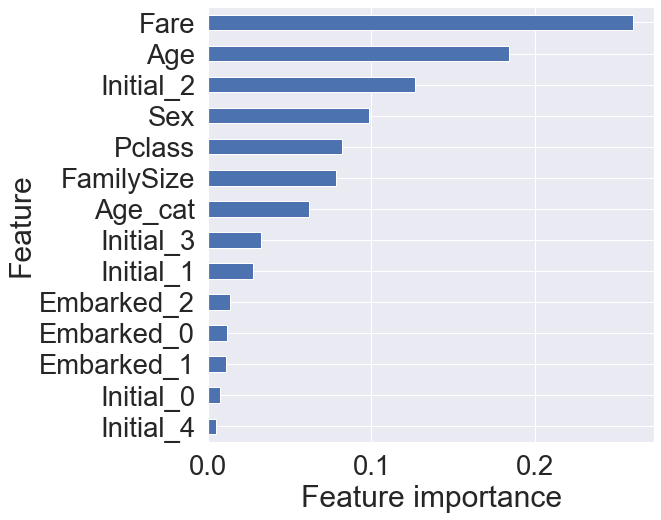

In [251]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

### 4.B keras를 사용한 NN 모델 개발

In [252]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam, SGD

In [254]:
nn_model = Sequential()
nn_model.add(Dense(32,activation='relu',input_shape=(14,)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1,activation='sigmoid'))

In [255]:
Loss = 'binary_crossentropy'
nn_model.compile(loss=Loss,optimizer=Adam(),metrics=['accuracy'])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

In [256]:
history = nn_model.fit(X_tr,
                       y_tr,
                       batch_size=64,
                       epochs=500,
                       validation_data=(X_vld, y_vld),
                       verbose=1)

Epoch 1/500
12/12 [==============================] - 0s 23ms/step - loss: 0.9840 - accuracy: 0.5098 - val_loss: 0.6974 - val_accuracy: 0.5419
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.8102 - accuracy: 0.5520 - val_loss: 0.6350 - val_accuracy: 0.6313
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7795 - accuracy: 0.5857 - val_loss: 0.6206 - val_accuracy: 0.6369
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 0.7064 - accuracy: 0.5997 - val_loss: 0.6171 - val_accuracy: 0.6480
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5843 - val_loss: 0.6085 - val_accuracy: 0.6536
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5983 - val_loss: 0.5901 - val_accuracy: 0.6592
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.6081 - val_loss: 0.5896 - val_accuracy: 0.7430
Epoch 8/500


### 5. 모델 예측 및 평가

이제 답안지를 제출해 볼 차례입니다!

이제 모델이 학습하지 않았던(보지 않았던) 테스트셋을 모델에 주어서, 생존여부를 예측해보겠습니다.
이 결과는 실제로 submission(제출용) 이므로 결과는 leaderboard 에서 확인할 수 있습니다.
캐글에서 준 파일, gender_submission.csv 파일을 읽어서 제출 준비를 하겠습니다

In [274]:
submission = pd.read_csv('./input/sample_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [275]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [276]:
submission.to_csv('my_first_submission.csv', index=False)

### 5.B NN 예측 및 평가

In [277]:
submission = pd.read_csv('./input/sample_submission.csv')
prediction = nn_model.predict(X_test)
prediction = prediction > 0.5
prediction = prediction.astype(np.int)
prediction = prediction.T[0]
prediction.shape

(418,)

In [278]:
submission['Survived'] = prediction
submission.to_csv('my_nn_submission.csv', index=False)

처음 시작할 때 많은 답답했던 부분이 이거였습니다.
사실 아직도 답은 못찾았고, 답은 없는 것 같습니다.
하지만 제가 주로 어떻게 하는지 알려드리자면,

* 일단 캐글 대회 참여해본다.

> 캐글 대회를 참여하고, 여러 분석한 커널들을 보면 다양한 최신 기술과 문제를 접근하는 방법을 배우게 됩니다.

* 모르는 코드는 print하면서 분석하고, 안보고 다시 적어본다.

> 모르는 코드는 어느정도 분석하는 시간을 가져야 합니다.

* 모르는 함수는 공식 API 문서를 본다.

> sklearn, tensorflow, pandas, keras.. 와같은 유명 패키지들은 공식 문서가 상당히 잘 되어있습니다.
>
>해당 함수는 여러 파라미터를 가지고 있는데 하나하나 보면서 어떤 역할을 하는지 훑어만 봐도 나중에 활용할 때 도움이 되었습니다.

* 기본 공부도 병행한다.

> 요즘 너무나도 좋은 강의, 책들이 많습니다. 이걸 보시면서 공부하시면 더 도움이 될 것 같습니다.

* 그래도 모르겠다면 구글링, github...

> 많은 블로그, 많은 오픈소스 안에 훌륭한 예제와 설명이 많습니다.
빠르게 접근하기에 이만한 방법도 없을 것 같습니다.


{강의 리스트}

> * 최성철 교수님 : 머신러닝을 위한 Python 워밍업
>
>처음 판다스, 넘파이 와 같은 라이브러리를 배우기에 좋았습니다.

> * 김성훈 교수님 : 머신러닝과 딥러닝 BASIC
>
>처음 텐서플로우로 딥러닝 입문하는데 너무 좋았습니다.

> * Andrew Ng 교수님 : 오픈 코세라 강의
>
>기본부터 찬찬히 공부하기에 너무 좋은 강의 입니다.
>
>강의 절반은 한글화가 되어 있으니 접근하시는데 무리가 없을 것입니다!